In [1]:
import numpy as np
from scipy import optimize
from scipy import integrate
import matplotlib.pyplot as plt

In [2]:
####
##Values
####
eps = 2.6e-4
m_a = 1.0e-23
phi0_0 = 0.1
phi0_1 = 0.2
phi0_2 = 0.3

In [3]:
x0_0 = 3.#first integration
x0_0v1 = 0.0 # Start of integration
xf_0v1 = 10. # End of integration
step_0 = 0.5
##l=0
u1_0 = 0.63173215# 1st trial value of unknown init. cond.
u2_0 = 1.28125868# 2nd trial value of unknown init. cond.
u_0 = np.array([u1_0, u2_0])
###l=1 
u1_1 = -3.7# 1st trial value of unknown init. cond.
u2_1 = -2.2# 2nd trial value of unknown init. cond.
u_1 = np.array([u1_1, u2_1])
##l=2
u1_2 = -3.75086524# 1st trial value of unknown init. cond.
u2_2 = -2.21111819# 2nd trial value of unknown init. cond.
u_2 = np.array([u1_2, u2_2])

In [4]:
def Integrate(func,x0,y0,x,h):
    # Finds value of y for a given x using step size h 
    # and initial value y0 at x0.
    def RK4(func,x0,y0,h):
        K0 = h*func(x0,y0)
        K1 = h*func(x0 + 0.5*h, y0 + 0.5*K0)
        K2 = h*func(x0 + 0.5*h, y0 + 0.5*K1)
        K3 = h*func(x0 + h, y0 + K2)
        return (K0 + 2.*K1 + 2.*K2 + K3)/6.
    X = []
    Y = []
    X.append(x0)
    Y.append(y0)
    while x0 < x:
         # Count number of iterations using step size or
        h = min(h,x - x0)# step height h
        y0 = y0 + RK4(func,x0,y0,h)#update next value of y
        x0 = x0 + h#update next value of x
        X.append(x0)
        Y.append(y0)
    return np.array(X),np.array(Y)
#########
def shooting(func,u,x0,x,xf,step,k,h=0.01):
    def res(u):# Boundary condition residual
        X,Y = Integrate(func,x0,IC(u,k),x,h)
        y = Y[len(Y) - 1]#last value of Y
        r = np.zeros(len(u))
        r[0] = y[0]#y0(inf)=0
        r[1] = y[2]/x + y[3]#y_3(inf)/r + y_4(inf)=0
        return r
    x_list = []
    root_list = []
    while x<=xf:
        #print("x=",x)
        x_list.append(x)
        #print("u=",u)
        root = optimize.root(res,u)
        #print("root=",root)
        u = root.x
        #print("u=",u)
        root_temp = optimize.root(res,root.x)
        #print("root_temp=",root_temp)
        root_list.append(root_temp.x)
        X,Y = Integrate(func,x0,IC(root_temp.x,k),x,h)
        x = x+step
    return X,Y,root_temp,np.array(x_list),np.array(root_list)
########
def IC(u,k):#Initial conditions array, the first correspond to the initial condition in phi
    return np.array([k,0.0,u[0],0.0,u[1]])
########
def f0(x,y):
    l = 0.
    F = np.zeros(5)
    if x==0:
        F[0] = y[1]
        F[1] = 2.*y[0]*(y[2]-y[4])
        F[2] = y[3]
        F[3] = 0.
        F[4] = 0.
    else:
        F[0] = y[1]
        F[1] = -2.*(l+1.)*y[1]/x +2.*y[0]*(y[2]-y[4])
        F[2] = y[3]
        F[3] = (2.*l+1.)*x**(2.*l)*y[0]**2. - 2.*y[3]/x
        F[4] = 0.
    return F
##########
def f1(x,y):
    l = 1.
    F = np.zeros(5)
    if x==0:
        F[0] = y[1]
        F[1] = 2.*y[0]*(y[2]-y[4])
        F[2] = y[3]
        F[3] = 0.
        F[4] = 0.
    else:
        F[0] = y[1]
        F[1] = -2.*(l+1.)*y[1]/x +2.*y[0]*(y[2]-y[4])
        F[2] = y[3]
        F[3] = (2.*l+1.)*x**(2.*l)*y[0]**2. - 2.*y[3]/x
        F[4] = 0.
    return F
############
def f2(x,y):
    l = 2.
    F = np.zeros(5)
    if x==0:
        F[0] = y[1]
        F[1] = 2.*y[0]*(y[2]-y[4])
        F[2] = y[3]
        F[3] = 0.
        F[4] = 0.
    else:
        F[0] = y[1]
        F[1] = -2.*(l+1.)*y[1]/x +2.*y[0]*(y[2]-y[4])
        F[2] = y[3]
        F[3] = (2.*l+1.)*x**(2.*l)*y[0]**2. - 2.*y[3]/x
        F[4] = 0.
    return F
########
def Mass_func(r,phi,l):
    Int = np.zeros(len(r))
    dr = np.diff(r)[0]
    phi_array = np.array(phi[:,0])
    for i in range(0,len(r)-1):
        Int[i+1] = dr*(phi_array[i+1]**2.*r[i+1]**(2.*l+2.)) + Int[i]
    return Int

In [5]:
def Vc2_cir(M,r):
    units =8.95e10*eps**2.
    return (units*M)/r
####
##Units for r in kpc
###
def r_units(r):
    return (6.39e-27*r)/(eps*m_a)

In [6]:
X0_f,Y0_f,root0_f,arr_x0,arr_list0=shooting(f0,u_0,x0_0v1,x0_0,xf_0v1,step_0,k=phi0_0)
X1_f,Y1_f,root1_f,arr_x1,arr_list1=shooting(f1,u_1,x0_0v1,x0_0,xf_0v1,step_0,k=phi0_1)
X2_f,Y2_f,root2_f,arr_x2,arr_list2=shooting(f2,u_2,x0_0v1,x0_0,xf_0v1,step_0,k=phi0_2)

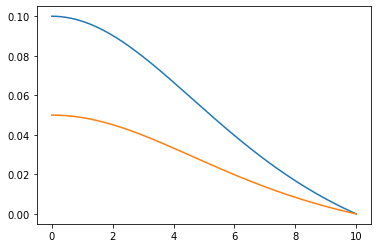

In [18]:
plt.plot(X0_f,Y0_f[:,0])
plt.plot(X0_f,Y0_f[:,0]*0.5)

In [7]:
##Mass
##
M_r0 = Mass_func(X0_f,Y0_f,l=0)
M_r1 = Mass_func(X1_f,Y1_f,l=1)
M_r2 = Mass_func(X2_f,Y2_f,l=2)

In [8]:
##Computing the circular speed
###
Vc2_r0 = Vc2_cir(M_r0,X0_f)
Vc2_r1 = Vc2_cir(M_r1,X1_f)
Vc2_r2 = Vc2_cir(M_r2,X2_f)

/Users/atalianb/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
##Computing r in kpc
###
X0_units = r_units(X0_f)
X1_units = r_units(X1_f)
X2_units = r_units(X2_f)
####
Vc_tot = np.sqrt(Vc2_r0 + Vc2_r1 + Vc2_r2)

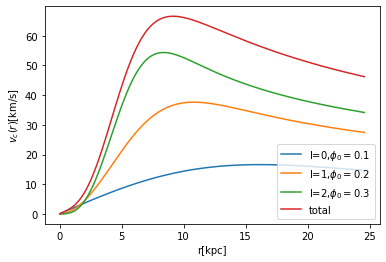

In [10]:
###Plot
plt.plot(X0_units,np.sqrt(Vc2_r0),label='l=0,'r'$ \phi_{0}=$'+str(phi0_0))
plt.plot(X1_units,np.sqrt(Vc2_r1),label='l=1,'r'$ \phi_{0}=$'+str(phi0_1))
plt.plot(X2_units,np.sqrt(Vc2_r2),label='l=2,'r'$ \phi_{0}=$'+str(phi0_2))
plt.plot(X0_units,Vc_tot,label='total')
plt.ylabel(r'$v_{c}(r)$[km/s]')
plt.xlabel("r[kpc]")
plt.legend(loc='lower right', prop={'size':10})